# Day 4 作業

## [作業目標]
* 透過以下的插值演算法來放大與縮小 Lena 圖(放大與縮小4倍)，並比較各個演算法的時間差異：

    1. Inter nearest interpolation
    2. Inter linear interpolation
    3. Inter area interpolation
    4. Inter cubic interpolation
    5. Inter lanczos4 interpolation

## [作業重點]
* 熟悉 OpenCV 的 resize 函數
* 學會使用 time 模組來計算程式運行時間
* 觀察圖片的變化

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
import os

# cv2 預設 color space 是 BGR，但 matplotlib，
# 顯示是以 RGB 來顯示，故需要做順序的調整

""" Your Code Here: 讀取 lena.png 並使用 matplotlib 顯示 """

img_dir = '/content/drive/MyDrive/DS_SUYA'
img_path = os.path.join(img_dir, 'lena.png')
img = cv2.imread(img_path)
print(type(img))

<class 'numpy.ndarray'>


# 進行放大的比較

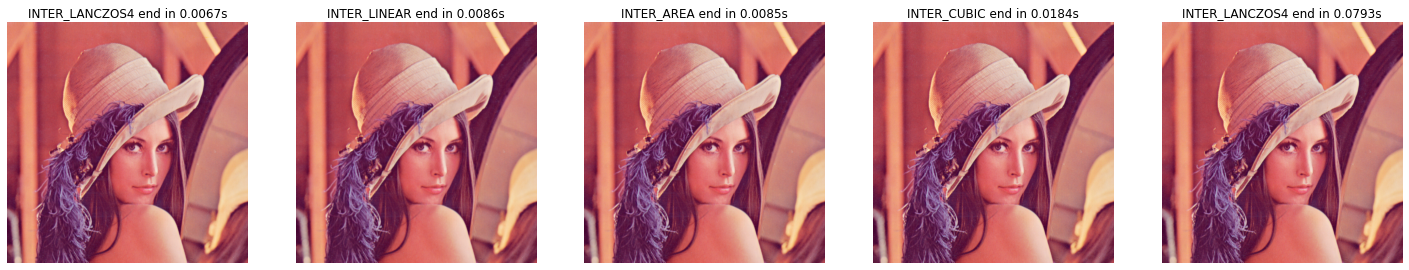

In [13]:
# 方便顯示與進行縮放
interpolation_lst = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_AREA, cv2.INTER_CUBIC, cv2.INTER_LANCZOS4]
interpolation_name = ['INTER_LANCZOS4', 'INTER_LINEAR', 'INTER_AREA', 'INTER_CUBIC', 'INTER_LANCZOS4']

# 定義欲放大與縮小的尺寸
small_length, big_length = int(img.shape[0] / 4), int(4 * img.shape[0])

# 定義作圖版面大小
plt.figure(figsize = (25, 5))

# 開始進行5種插值法的放大比較
for i in range(len(interpolation_name)):
    start = time.time() # 按下碼表計時
    """ Your Code Here: 插值演算法實作(Hint: cv2.resize) """
    img_larger = cv2.resize(img, (big_length, big_length), 
                            interpolation = interpolation_lst[i])
    end = time.time() # 結束計時
    
    # 開始做圖
    """ Your Code Here: 開始做圖 """
    plt.subplot(1, len(interpolation_name), i+1, 
                title=interpolation_name[i]+' end in {:.4f}s'.format(end-start))
    plt.axis('off')
    plt.imshow(img_larger[..., ::-1])
plt.show()

# 進行縮小的比較

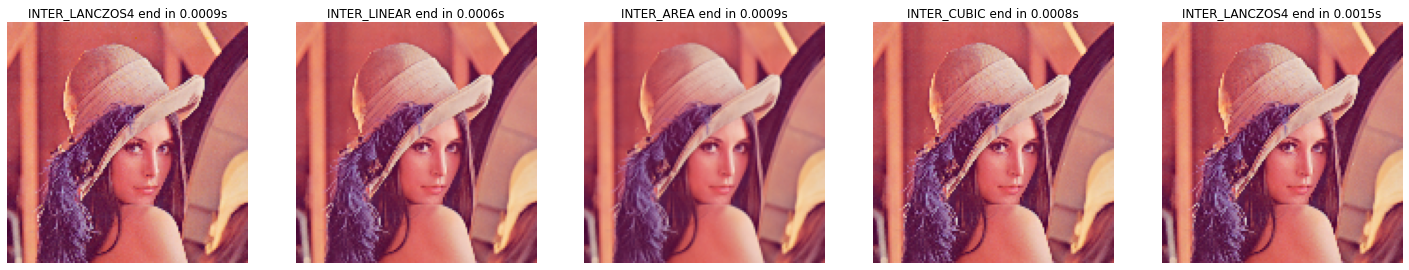

In [14]:
plt.figure(figsize = (25, 5))

# 開始進行5種插值法的縮小比較
for i in range(len(interpolation_lst)):
    start = time.time() # 按下碼表計時
    """ Your Code Here: 插值演算法實作(Hint: cv2.resize) """
    img_smaller = cv2.resize(img, (small_length, small_length), 
                            interpolation = interpolation_lst[i])
    end = time.time() # 結束計時
    
    # 開始做圖
    """ Your Code Here: 開始做圖 """
    plt.subplot(1, len(interpolation_name), i+1, 
                title=interpolation_name[i]+' end in {:.4f}s'.format(end-start))
    plt.axis('off')
    plt.imshow(img_smaller[..., ::-1])
plt.show()